In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from projet3 import utils
from projet3 import ead



/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


QUALITÉS NUTRITIONELLE D'UN REPAS À DESTINATION DES SPORTIFS
==========================================================
Pour un sportif être capable d'analyser la qualité de son repas et connaitre les
proportions des différent marconutriments et/ou micronutriments.

PRÉ-AMBULE
===========
Depuis la source de données accessible à l'addresse https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv, nous allons réaliser les tâches suivantes:
1. Analyser la qualité de la données ; boulons, complétude.
2. Analyse statisque univarié.
3. Analyse statisque bivarié.
4. Exploitation des données dans le but d'extraire les proportions en terme de macronutriments.


# ANALYSE QUALITATIVE DE LA DONNÉE


Version

In [2]:
utils.print_version()

VERSION librairies
Python version 3.7.4 (v3.7.4:e09359112e, Jul  8 2019, 14:54:52) 
[Clang 6.0 (clang-600.0.57)]
Numpy version 1.17.3
Pandas version 0.25.2
Matplotlib version 3.1.1
Seaborn version 0.9.0


In [3]:
# Données brutes
data_df = ead.get_data()

#Info
# les 10 premiere lignes


Extrait du dataset

In [4]:
data_df.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17T12:05:32Z,1542456333,2018-11-17T12:05:33Z,Mini coco,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000208,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1544207680,2018-12-07T18:34:40Z,1544207683,2018-12-07T18:34:43Z,Pistou d'ail des ours,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000000284,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1547120245,2019-01-10T11:37:25Z,1563551052,2019-07-19T15:44:12Z,Pain maïs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1565268412,2019-08-08T12:46:52Z,Salade de carottes râpées,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000000970,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1520506368,2018-03-08T10:52:48Z,1561463726,2019-06-25T11:55:26Z,Fromage blanc aux myrtilles,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Info complète du dataset

In [5]:
data_df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009071 entries, 0 to 1009070
Data columns (total 175 columns):
code                                          1009071 non-null object
url                                           1009071 non-null object
creator                                       1009068 non-null object
created_t                                     1009071 non-null int64
created_datetime                              1009070 non-null object
last_modified_t                               1009071 non-null int64
last_modified_datetime                        1009071 non-null object
product_name                                  959819 non-null object
generic_name                                  92125 non-null object
quantity                                      316407 non-null object
packaging                                     186416 non-null object
packaging_tags                                186410 non-null object
brands                                        594578 n

Description

In [6]:
data_df.describe()


,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.009071e+06,1.009071e+06,0.0,0.0,2.777260e+05,0.0,447410.000000,447410.000000,0.0,447410.000000,...,9260.000000,286063.000000,286063.000000,3.000000,0.0,31.000000,4.000000,20.00000,37.000000,15.000000
mean,1.518170e+09,1.540152e+09,NaN,NaN,4.000746e+16,NaN,1.622586,0.027311,NaN,0.071889,...,631.841741,9.217144,8.978092,29.333333,NaN,0.069577,0.090034,4.76000,0.026241,0.046147
std,4.079759e+07,3.133868e+07,NaN,NaN,2.108382e+19,NaN,2.349561,0.164923,NaN,0.316584,...,6860.797317,8.809736,9.272649,15.011107,NaN,0.031724,0.179977,4.24145,0.027702,0.145485
min,0.000000e+00,1.333873e+09,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000,NaN,0.000000,...,0.049000,-15.000000,-15.000000,14.000000,NaN,0.008000,0.000016,0.40000,0.001350,0.006500
25%,1.489092e+09,1.525511e+09,NaN,NaN,2.800000e+01,NaN,0.000000,0.000000,NaN,0.000000,...,111.000000,2.000000,1.000000,22.000000,NaN,0.056500,0.000038,3.50000,0.006900,0.007050
50%,1.524652e+09,1.552073e+09,NaN,NaN,4.900000e+01,NaN,1.000000,0.000000,NaN,0.000000,...,334.985000,10.000000,9.000000,30.000000,NaN,0.069000,0.000060,4.00000,0.022000,0.008500
75%,1.550432e+09,1.563562e+09,NaN,NaN,1.130000e+02,NaN,2.000000,0.000000,NaN,0.000000,...,617.125000,16.000000,17.000000,37.000000,NaN,0.089000,0.090056,5.20000,0.027600,0.011000
max,1.571790e+09,1.571790e+09,NaN,NaN,1.111111e+22,NaN,38.000000,3.000000,NaN,6.000000,...,656298.600000,40.000000,40.000000,44.000000,NaN,0.130000,0.360000,21.50000,0.150000,0.572000


Les lignes en doublons

In [7]:
data_df[data_df.duplicated()==True]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
157221,254133007546,http://world-en.openfoodfacts.org/product/0254...,openfoodfacts-contributors,1537196361,2018-09-17T14:59:21Z,1556215968,2019-04-25T18:12:48Z,pain rando,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371423,3217690055020,http://world-en.openfoodfacts.org/product/3217...,kiliweb,1554670701,2019-04-07T20:58:21Z,1556111603,2019-04-24T13:13:23Z,Syrup green apple,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472544,335820004060,http://world-en.openfoodfacts.org/product/3358...,openfoodfacts-contributors,1563792647,2019-07-22T10:50:47Z,1571503410,2019-10-19T16:43:30Z,NaN,NaN,500 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575022,3700225107238,http://world-en.openfoodfacts.org/product/3700...,kiliweb,1558182525,2019-05-18T12:28:45Z,1558183963,2019-05-18T12:52:43Z,Lentilles corail,NaN,500 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608928,3760124630473,http://world-en.openfoodfacts.org/product/3760...,openfoodfacts-contributors,1552607164,2019-03-14T23:46:04Z,1556658319,2019-04-30T21:05:19Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725712,5060136216664,http://world-en.openfoodfacts.org/product/5060...,sebleouf,1556491987,2019-04-28T22:53:07Z,1556573491,2019-04-29T21:31:31Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763343,5425021250251,http://world-en.openfoodfacts.org/product/5425...,kiliweb,1560100380,2019-06-09T17:13:00Z,1563048678,2019-07-13T20:11:18Z,Filet de poulet sauce Chakchouka,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821512,7613033065569,http://world-en.openfoodfacts.org/product/7613...,openfoodfacts-contributors,1490187090,2017-03-22T12:51:30Z,1556217855,2019-04-25T18:44:15Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
971452,8711743560042,http://world-en.openfoodfacts.org/product/8711...,sebleouf,1556491307,2019-04-28T22:41:47Z,1556573426,2019-04-29T21:30:26Z,NaN,NaN,18 x 1.5 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
977400,8715061627104,http://world-en.openfoodfacts.org/product/8715...,sebleouf,1556478017,2019-04-28T19:00:17Z,1556573120,2019-04-29T21:25:20Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Complétude des colonnes, nous allons cherche les colonnes dont la compètude est >= 70 % et celles <= 0.01%

In [8]:
completude_df = ead.get_columns_completude()

In [9]:
completude_gt_70 = completude_df[completude_df["Completude"] >= 70.0]

In [10]:
completude_gt_70

,Column,Completude
0,code,100.000000
1,url,100.000000
2,creator,99.999703
3,created_t,100.000000
4,created_datetime,99.999901
5,last_modified_t,100.000000
6,last_modified_datetime,100.000000
7,product_name,95.119075
31,countries,99.827663
32,countries_tags,99.827564


In [11]:
print(f'Dimension {completude_gt_70.shape}')


Dimension (26, 2)


In [12]:
completude_lt_001 = completude_df[completude_df["Completude"] < 0.01]

In [13]:
completude_lt_001

,Column,Completude
27,cities,0.000000
36,allergens_en,0.000000
42,no_nutriments,0.000000
44,additives,0.002973
48,ingredients_from_palm_oil,0.000000
51,ingredients_that_may_be_from_palm_oil,0.000000
72,-butyric-acid_100g,0.000099
73,-caproic-acid_100g,0.000000
74,-caprylic-acid_100g,0.000099
75,-capric-acid_100g,0.000396


In [14]:
print(f"Dimension {completude_lt_001.shape}")


Dimension (51, 2)


## Résultat
Données issues de l'open data disponible gratuitement. Elle est composé de plus d'un million d'entrée et 175 colonnes:
- pour 51 colonnes on dispose de moins des 0.01% des lignes de renseignées, ces colonnes peuvent être omises de notre analyse
- pour 26 colonnes on dispose de plus de 70% des lignes de renseignées
- 14 lignes sont en doublons
- 119 colonnes correspondes à des données quantitative dont seulement 50 pour lesquels on dispose de plus de 1000 lignes (0.01% du volumes) de renseignées

## Conclusion
Les premières analyses sont plutôt positives; on dispose de peu de doublons et on dispose de 26 colonnes pour lesquelles plus de 70% des lignes sont renseignées.


# ANALYSES STATISTIQUES UNIVARIÉES
Dans cette partie nous allons procéder à l'analyse univariée sur les colonnes retenues dans le cadre de notre analyse

## Choix des colonnes
Dans un premier temps, sont retenues les colonnes pour lesquelles 70% de lignes sont remplies

In [15]:
completude_gt_70["Column"]

0                        code
1                         url
2                     creator
3                   created_t
4            created_datetime
5             last_modified_t
6      last_modified_datetime
7                product_name
31                  countries
32             countries_tags
33               countries_en
55              pnns_groups_1
56              pnns_groups_2
57                     states
58                states_tags
59                  states_en
62                  image_url
63            image_small_url
68                energy_100g
70                   fat_100g
71         saturated-fat_100g
106        carbohydrates_100g
107               sugars_100g
117             proteins_100g
121                 salt_100g
122               sodium_100g
Name: Column, dtype: object

Seules les colonnes
```
68                energy_100g
70                   fat_100g
71         saturated-fat_100g
106        carbohydrates_100g
107               sugars_100g
117             proteins_100g
121                 salt_100g
122               sodium_100g
```
Correspondes à des données quantitatives. Nous allons donc étendre notre analyse a certaines colonnes incluses dans

In [16]:
completude_df[(completude_df["Completude"] >= 10.0)&(completude_df["Completude"] < 70.0)]

,Column,Completude
9,quantity,31.356267
10,packaging,18.474022
11,packaging_tags,18.473428
12,brands,58.923307
13,brands_tags,58.918451
14,categories,36.906323
15,categories_tags,36.905926
16,categories_en,36.905926
21,labels,19.570972
22,labels_tags,19.573350


On retient alors les colonnes suivantes
```
104	trans-fat_100g	14.303652
105	cholesterol_100g	14.382140
116	fiber_100g	29.860238
124	vitamin-a_100g	13.779704
129	vitamin-c_100g	14.132801
143	calcium_100g	14.473610
145	iron_100g	14.142711
```
On regrettera de ne pas pouvoir retenir les vitamines B, leur couverture étant trop faible.

In [17]:
all_columns = [
    'calcium_100g','cholesterol_100g', 'trans-fat_100g', 'iron_100g',
    'vitamin-c_100g', 'vitamin-a_100g', 'fat_100g', 'saturated-fat_100g', 
    'sugars_100g', 'carbohydrates_100g', 'proteins_100g','salt_100g',  
    'sodium_100g'
]
energie = ["energy_100g"]
categories_columns = ['code', 'product_name']

## Détection et traitement des données aberrantes.

In [18]:
# Restrictions aux index étudiés
data_restricted_df = data_df[all_columns]
data_restricted_df.describe()

,calcium_100g,cholesterol_100g,trans-fat_100g,iron_100g,vitamin-c_100g,vitamin-a_100g,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,proteins_100g,salt_100g,sodium_100g
count,146049.000000,145126.000000,144334.000000,142710.000000,142610.000000,139047.000000,8.044550e+05,7.748310e+05,7.903930e+05,804412.000000,8.063660e+05,7.865370e+05,7.864860e+05
mean,0.214219,0.028468,0.073794,0.006987,0.038394,0.003074,2.495856e+01,1.111774e+01,2.002262e+01,29.904906,1.185912e+02,1.055407e+02,4.241152e+01
std,6.556936,0.901867,1.494106,0.339303,2.763584,0.454334,9.756626e+03,5.099556e+03,5.146044e+03,961.252502,9.889830e+04,9.120719e+04,3.648451e+04
min,0.000000,0.000000,-3.570000,-0.000260,-0.002100,-0.000340,0.000000e+00,0.000000e+00,-1.786000e+01,0.000000,-8.000000e+02,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e-01,1.000000e-01,8.000000e-01,3.570000,1.200000e+00,6.000000e-02,2.000000e-02
50%,0.036000,0.000000,0.000000,0.001030,0.000000,0.000000,6.800000e+00,1.900000e+00,4.000000e+00,15.400000,5.700000e+00,5.200000e-01,2.001520e-01
75%,0.114000,0.020000,0.000000,0.002480,0.004000,0.000107,2.140000e+01,7.400000e+00,2.000000e+01,54.000000,1.200000e+01,1.343660e+00,5.280000e-01
max,950.000000,141.000000,369.000000,50.000000,716.981100,100.000000,8.748748e+06,4.488758e+06,4.574988e+06,857855.000000,8.880858e+07,8.088869e+07,3.235548e+07


On constate des données < 0 et d'autre > 100g, on va donc procéder à des remplacements

In [28]:
# TODO: remplacer par la mediane

for c in data_restricted_df.columns:
    data_restricted_df[c][data_restricted_df[c] <= 0] = data_restricted_df[c].median()
    data_restricted_df[data_restricted_df >= 100] = data_restricted_df[c].median()
    data_restricted_df[data_restricted_df.isna()] = 0

/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [20]:
# Vérification
data_restricted_df["energy_100g"] = data_df["energy_100g"]
data_restricted_df.describe()

/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,calcium_100g,cholesterol_100g,trans-fat_100g,iron_100g,vitamin-c_100g,vitamin-a_100g,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,proteins_100g,salt_100g,sodium_100g,energy_100g
count,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,8.092020e+05
mean,1.839438e-02,3.700970e-03,9.732139e-03,9.881689e-04,3.114166e-03,2.254810e-04,1.117251e+01,4.185724e+00,1.151205e+01,2.451161e+01,7.636292e+00,1.105378e+00,4.650445e-01,8.237200e+36
std,3.626446e-01,2.547620e-01,3.600448e-01,1.276237e-01,2.576120e-01,9.287011e-02,1.497129e+01,7.117624e+00,1.811611e+01,2.578913e+01,8.493764e+00,4.407878e+00,2.110167e+00,7.409827e+39
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-10,1.000000e-16,1.000000e-27,1.000000e-20,1.000000e-24,1.000000e-29,4.000000e-30,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,5.000000e-01,1.900000e+00,8.100000e+00,3.380000e+00,1.500000e-01,5.600000e-02,4.300000e+02
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,5.000000e-01,1.900000e+00,8.100000e+00,3.380000e+00,1.500000e-01,5.600000e-02,1.096000e+03
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.650000e+01,5.000000e+00,1.208000e+01,4.520000e+01,9.500000e+00,1.080000e+00,4.257040e-01,1.674000e+03
max,9.900600e+01,9.790000e+01,8.570000e+01,5.000000e+01,8.572000e+01,7.300000e+01,9.999000e+01,9.990000e+01,9.999000e+01,9.999000e+01,9.900000e+01,9.999000e+01,9.800000e+01,6.665559e+42


Visualisation des boites à moustache

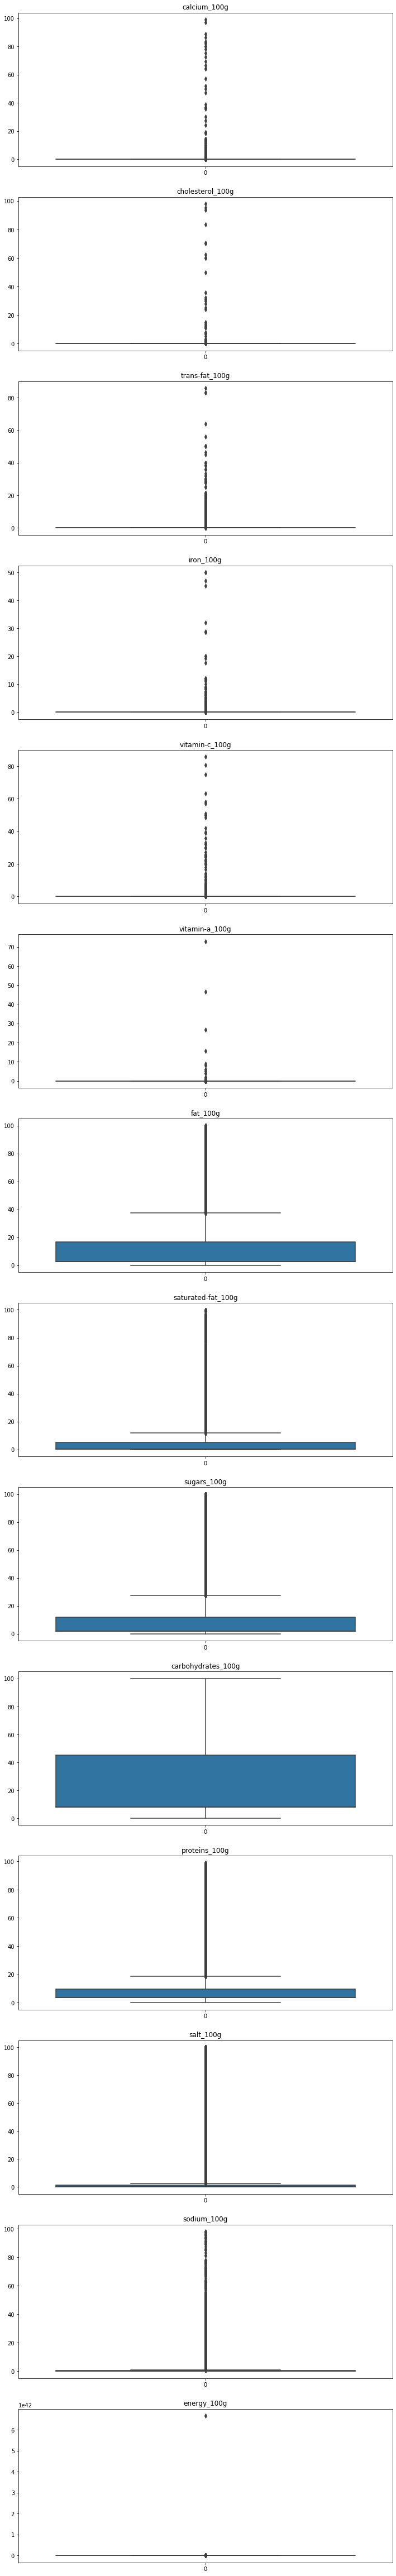

In [21]:
n = len(data_restricted_df.columns)
fig, ax = plt.subplots(n, 1, figsize=(12,n*6))
for i, c in enumerate(data_restricted_df.columns):
    plt.sca(ax[i])
    try:
        ax_ = sns.boxplot(data=data_restricted_df[c])
        plt.title(c)
    except ValueError as error:
        print(error)

Résultats pour les colonnes, calcium_100g, cholesterol_100g,trans-fat_100g,iron_100g,vitamin-c_100g, vitamin-a_100g les données sont trop applaties, nous avons un problème d'échelle. 
Ces données seront traitées en mg pour 100g.

In [22]:
data_restricted_df["calcium_100g"] *= 1000
data_restricted_df["cholesterol_100g"] *= 1000
data_restricted_df["trans-fat_100g"] *= 1000
data_restricted_df["vitamin-c_100g"] *= 1000
data_restricted_df["vitamin-a_100g"] *= 1000

/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Affichage des boites à moustache sans les outliers afin de pouvoir afficher les quartiles pour toutes les colonnes.

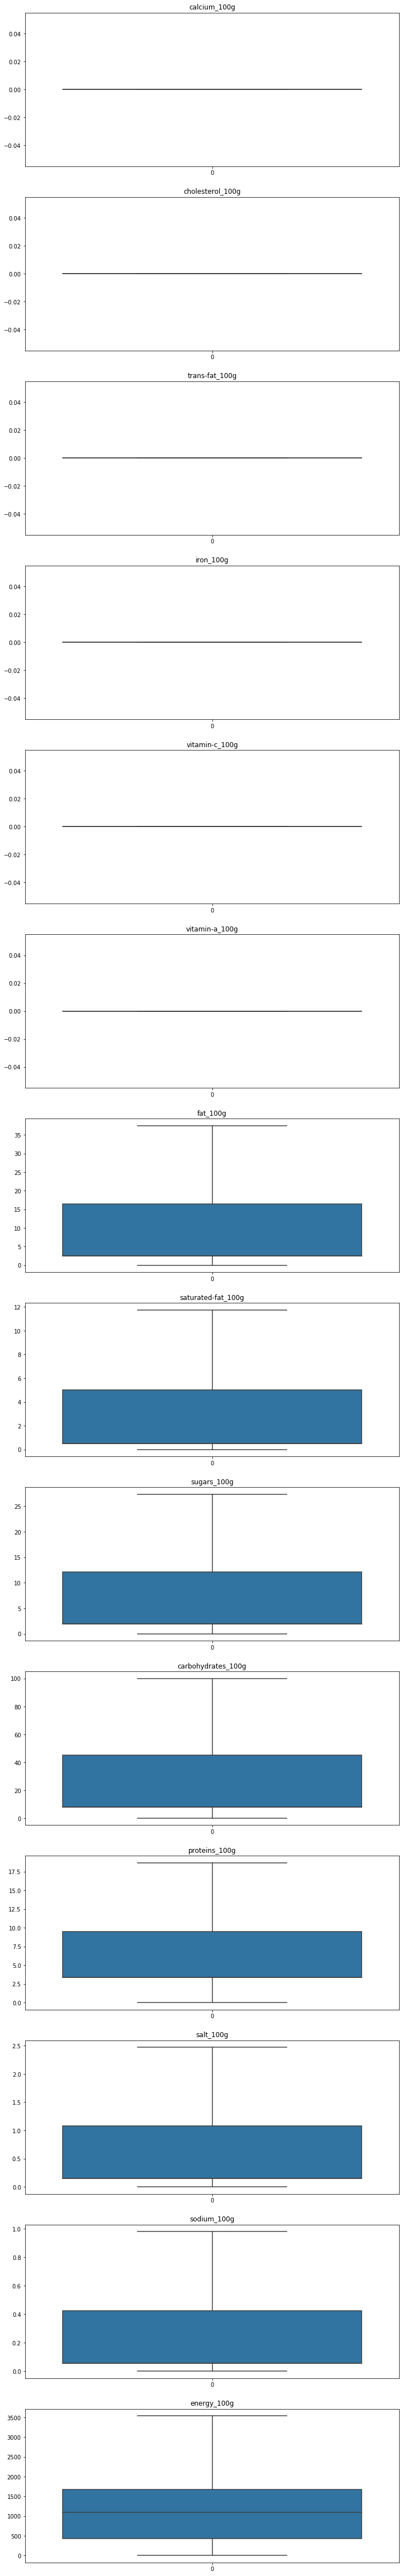

In [24]:
n = len(data_restricted_df.columns)
fig, ax = plt.subplots(n, 1, figsize=(12,n*6))
for i, c in enumerate(data_restricted_df.columns):
    plt.sca(ax[i])
    try:
        y_values = data_restricted_df[c]
        # affichage sans les outilers
        ax_ = sns.boxplot(data=data_restricted_df[c], showfliers=False)
        plt.title(c)
        #plt.ylim(0, 110)
    except ValueError as error:
        print(error)

## Affichage des histogrammes pour les différents index

Analyse de calcium_100g
count    1.009071e+06
mean     1.839438e+01
std      3.626446e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.900600e+04
Name: calcium_100g, dtype: float64
Analyse de cholesterol_100g
count    1.009071e+06
mean     3.700970e+00
std      2.547620e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.790000e+04
Name: cholesterol_100g, dtype: float64
Analyse de trans-fat_100g
count    1.009071e+06
mean     9.732139e+00
std      3.600448e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.570000e+04
Name: trans-fat_100g, dtype: float64
Analyse de iron_100g
count    1.009071e+06
mean     9.881689e-04
std      1.276237e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.000000e+01
Name: iron_100g, dtype: float64
Analyse de vitamin-c_100g
count    1.009071e+06
mean  

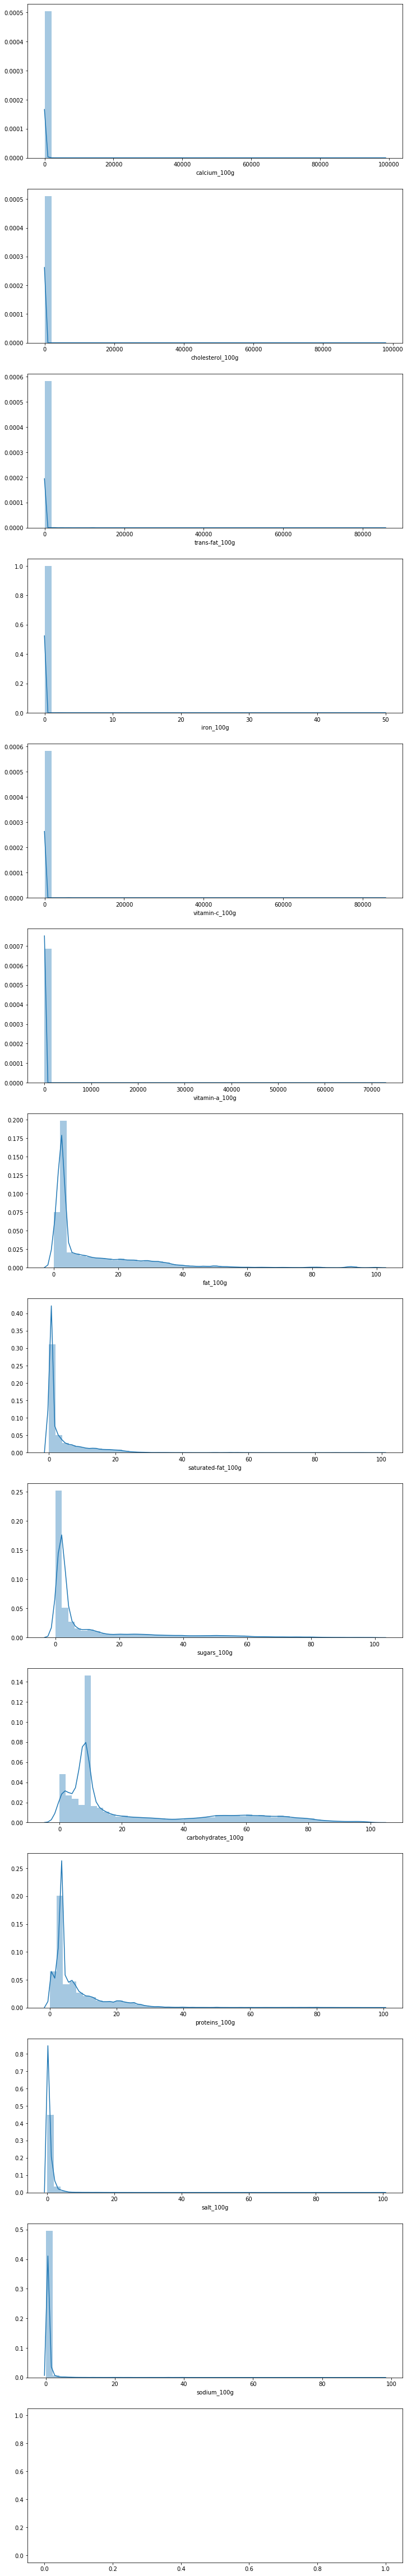

In [26]:
# 
columns  = all_columns + ["energy_100g"]
data_restricted_df[columns][data_restricted_df[columns].isna()] = 0
n = len(columns)
fig, ax = plt.subplots(n, 1, figsize=(12,n*6))

for i, s in enumerate(columns):
    try:
        plt.sca(ax[i])
        print(f"Analyse de {s}")
        print(data_restricted_df[s].describe())
        sns.distplot(data_restricted_df[s], kde=True, norm_hist=True)
    except Exception as error:
        print(f'{error} while the display')


## Résultats
Une fois de plus on constate que les colonnes calcium_100g, cholesterol_100g,trans-fat_100g,iron_100g,vitamin-c_100g, vitamin-a_100g sont très applaties. Pour les autres index on constate une répartition asymétrique vers la droite avec une valeur modal assez proche de 0. 

## Conclusion
Etant donnée le cadre de notre projet; répartition des macronutriment et/ou micronutriments dans le cadre de d'une alimentation de sportif. 
Nous allons omettre ces colonnes afin de préciser notre projet et nous concentrer sur la répartition des macronutriments.


# ANALYSES STATISTIQUEs MULTIVARIÉES

## Affichage des pair plots
Nous allons au préalable filter sur les lignes pour lesquelles toutes les colonnes sont renséignées. 

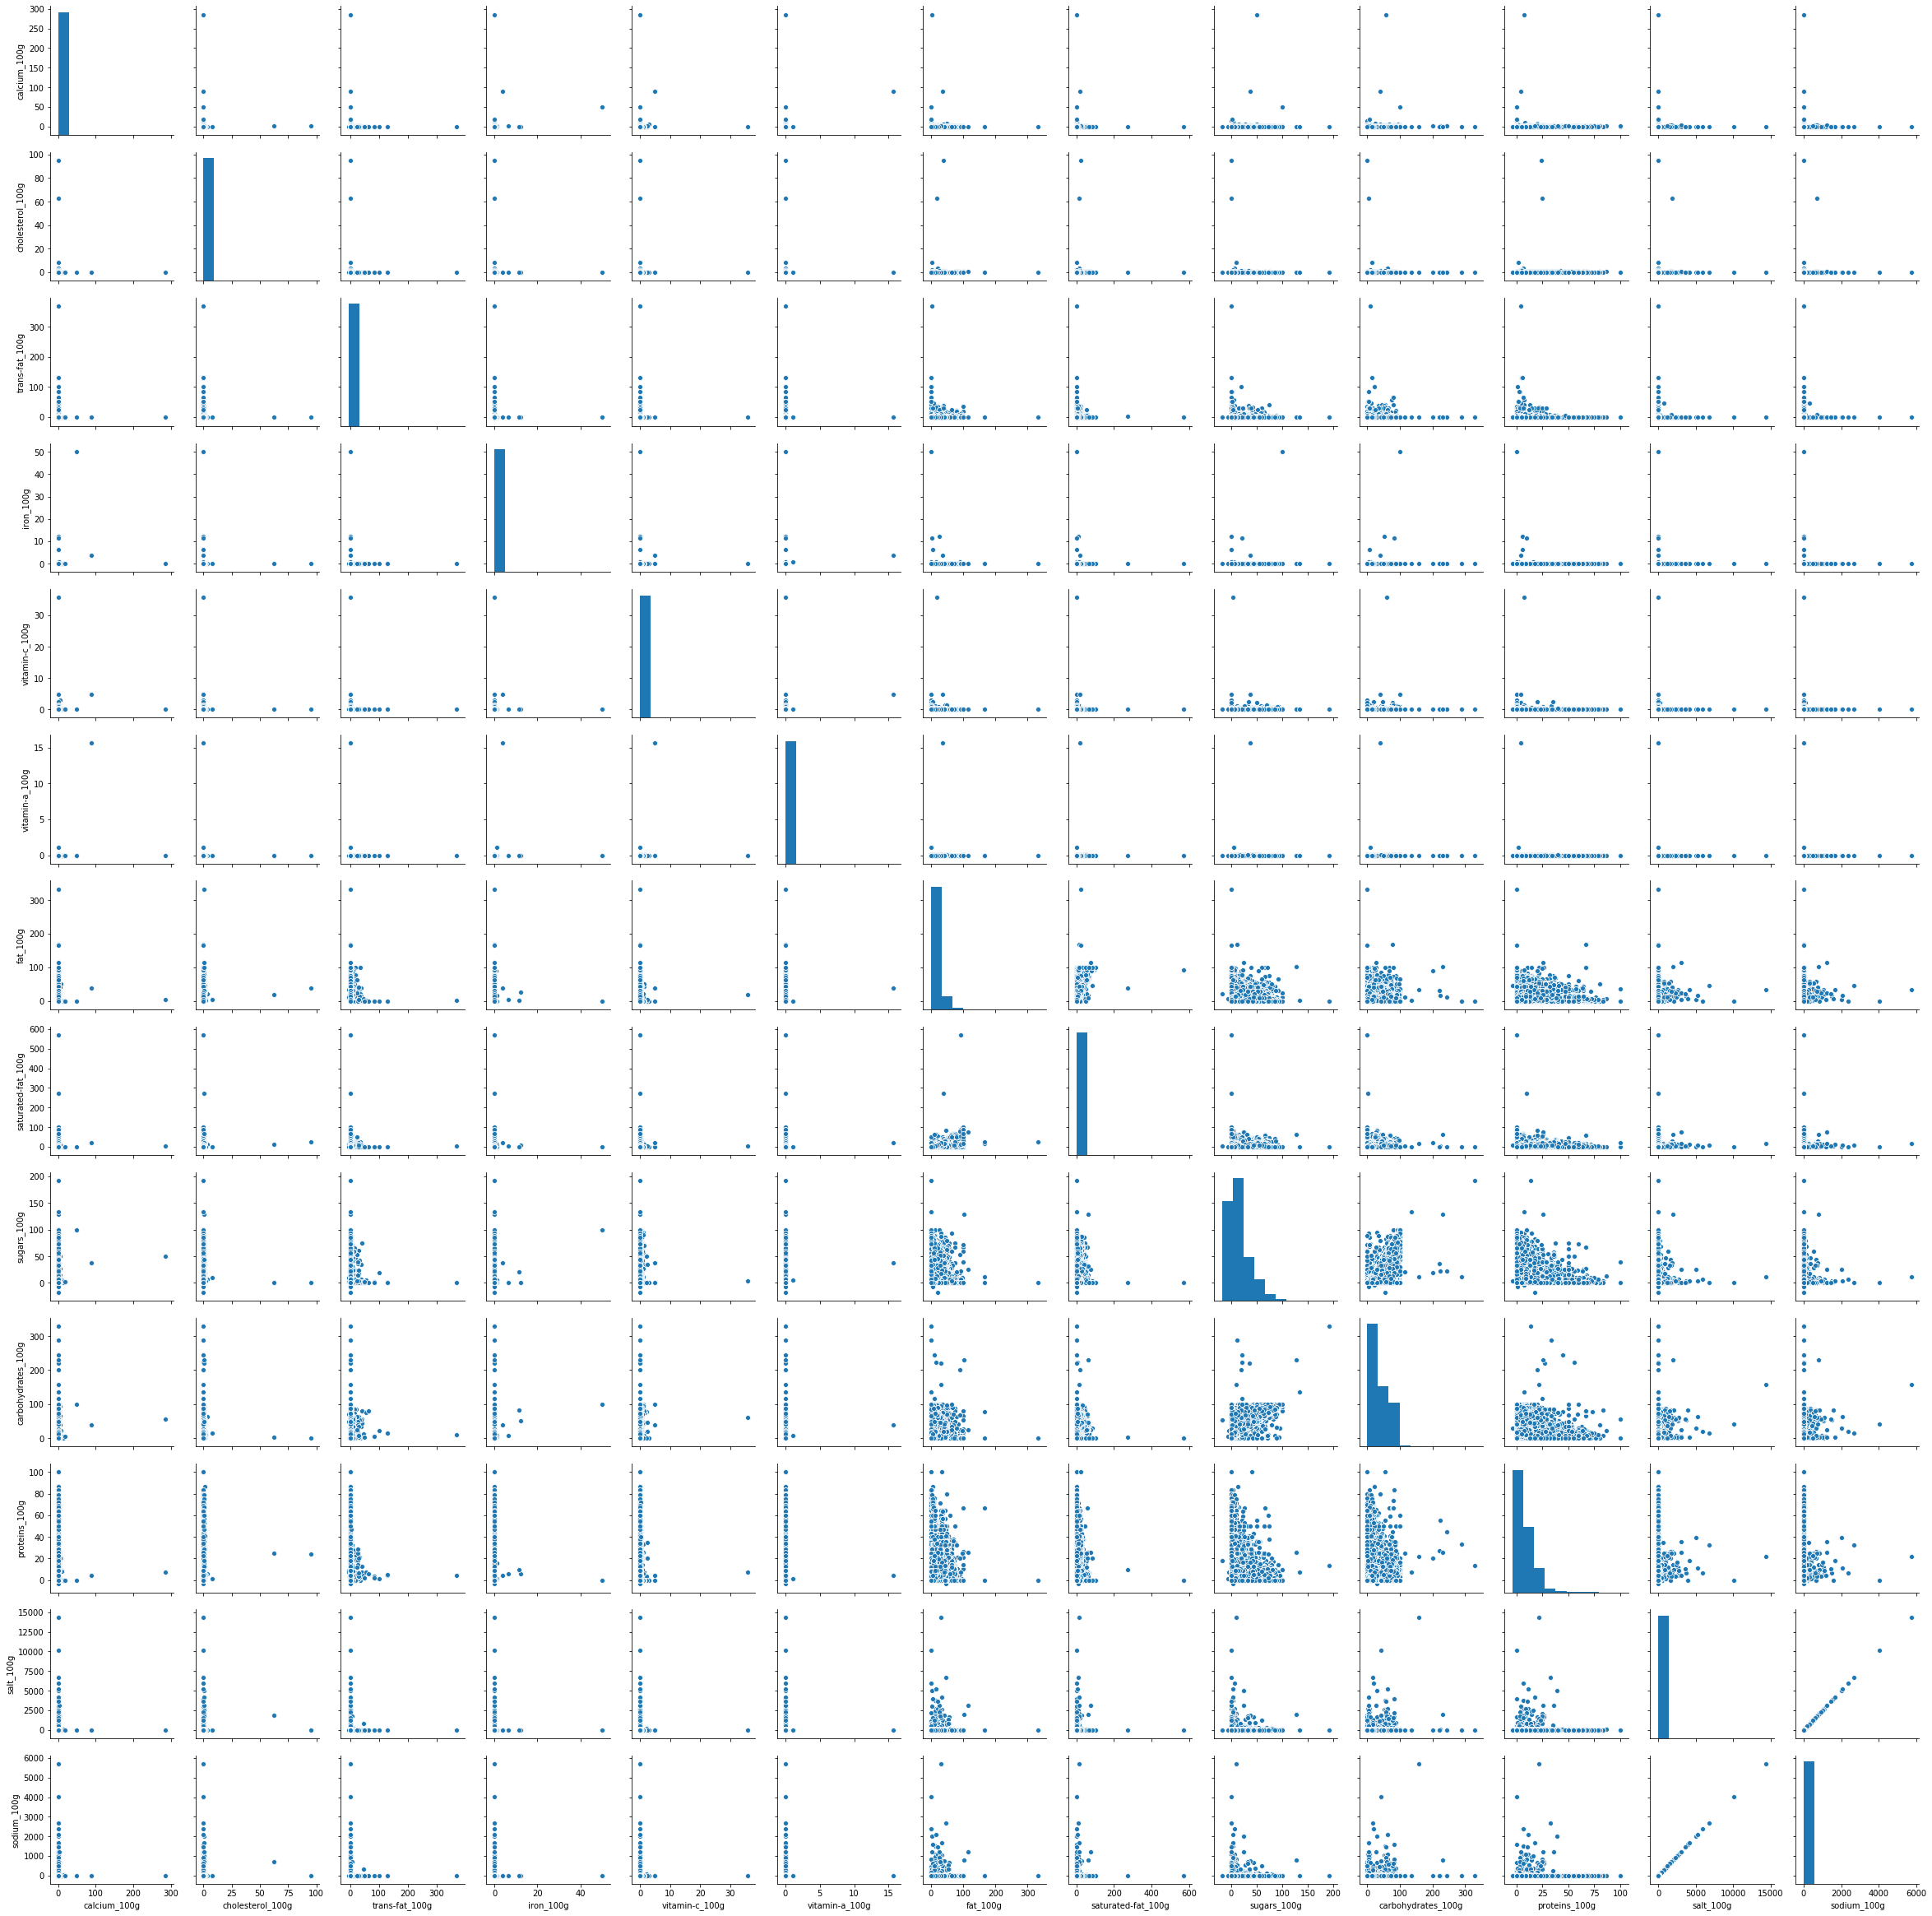

In [35]:
completed_data = data_df[utils.make_filter(data_df[all_columns], *all_columns)]
sns.pairplot(completed_data[all_columns])

## Affichage de la Heat map

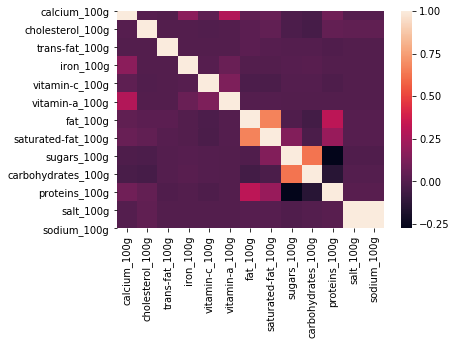

In [36]:
sns.heatmap(completed_data[all_columns].select_dtypes(include=np.number).corr())

## Résultat
On constate une forte corrélation etre le sodium et le sel.


# EXPLOITATION DES DONNEES
Analyse de la composition d'un repas, composé de plusiuers produits

In [37]:
columns = ['fat_100g', 'saturated-fat_100g', 'sugars_100g', 
           'carbohydrates_100g', 'proteins_100g','salt_100g',  
           'calcium_100g', 'cholesterol_100g',
           'trans-fat_100g', 'iron_100g', 'vitamin-c_100g', 
           'vitamin-a_100g', 'alcohol_100g']
columns_mg = ["vitamin-a_100g", "vitamin-c_100g", "iron_100g"]

Réalisation d'un échantillon (repas) compose de 5 produits

In [38]:
sample = completed_data.sample(5)
codes = sample["code"]
sum_ = sample.sum()


Nom des produits 

In [39]:
completed_data[["product_name"]]

,product_name
42,Banana Chips Sweetened (Whole)
43,Peanuts
175,Granola Cranberry And Acai
178,"Peanuts, Mixed Nuts"
246,Cranberries
...,...
1007771,"Lee, Special Crackers"
1007772,Sugar Crackers
1007942,Chipotle Peppers In Adobo Sauce
1007943,Dal Makhani


Données de référence

In [40]:
reference = utils.get_reference(completed_data, columns, columns_mg)

In [41]:
# Données de référence
reference

fat_100g               4.874375
saturated-fat_100g     0.682625
sugars_100g            4.771250
carbohydrates_100g    28.481250
proteins_100g          7.510625
salt_100g              0.569830
calcium_100g           0.077287
cholesterol_100g       0.139706
trans-fat_100g         0.025000
iron_100g              1.586375
vitamin-c_100g         4.808688
vitamin-a_100g         0.166063
alcohol_100g           0.000000
dtype: float64

In [42]:
# Données en Kcal
metrics_brut = utils.get_metrics(sample, codes=list(codes), columns=columns, columns_mg=columns_mg)
metrics_brut

fat_100g              13.11400
saturated-fat_100g     3.59200
sugars_100g            9.18000
carbohydrates_100g    15.04200
proteins_100g          3.94000
salt_100g              0.24984
calcium_100g           0.03860
cholesterol_100g       0.01080
trans-fat_100g         0.27000
iron_100g              1.38400
vitamin-c_100g         1.36000
vitamin-a_100g         0.26682
alcohol_100g               NaN
dtype: float64

Comparaison repas/reference

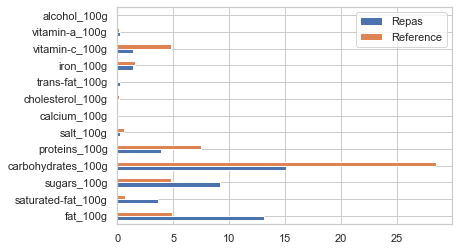

In [43]:
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
data_metrics = pd.DataFrame({"Repas": metrics_brut, "Reference": reference})
data_metrics.plot.barh()
plt.show()


Affichage radar

/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


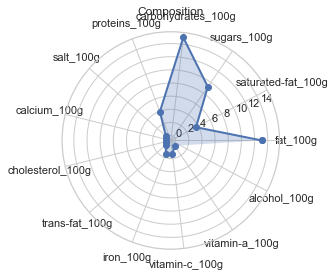

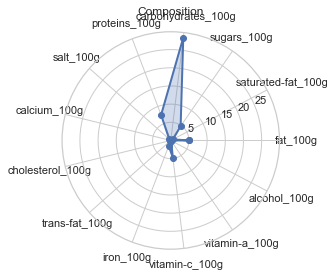

In [44]:
utils.plot_radar(metrics_brut, columns)
utils.plot_radar(reference, columns)


Repartition energétique

In [45]:
sample_c = utils.get_kcal(metrics_brut)
sample_c.describe()

count      3.000000
mean      88.509733
std       68.943472
min       15.760000
25%       56.324000
50%       96.888000
75%      124.884600
max      152.881200
dtype: float64

Reparition energetique du repas

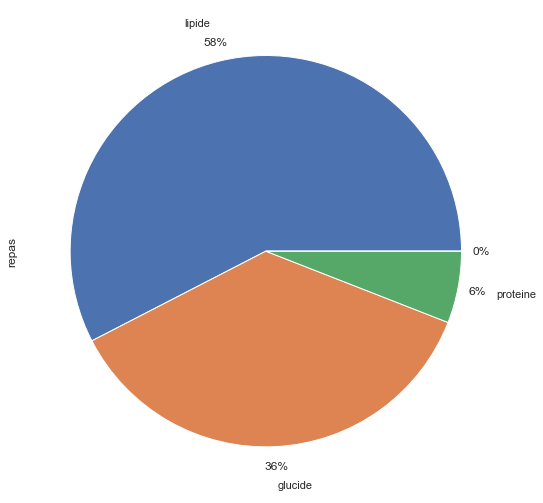

In [46]:
sample_c.plot.pie(label="repas", autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, figsize=(18, 9))

Reparition energetique de la référence

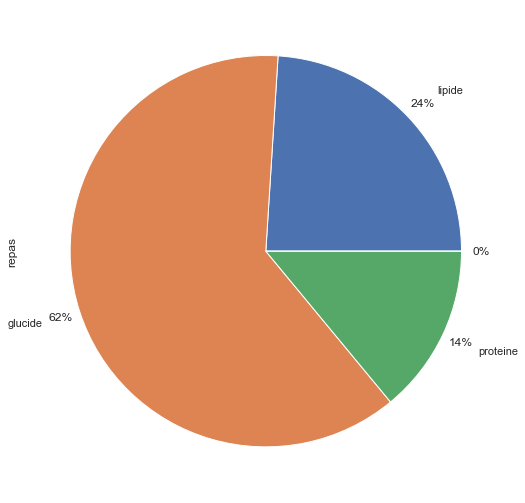

In [47]:
sample_ref_c = utils.get_kcal(reference)
sample_ref_c.plot.pie(label="repas", autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, figsize=(18, 9))

# CONCLUSION 
Dans la dernière partie nous nous sommes concentré à calculer la répartition des macronutiments pour 100g de produit, 

In [ ]:
# TODO:
reference statique 